In [203]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


%matplotlib inline

Web scraping, setup the funcation.

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "C:\ProgramData\Microsoft\Windows\Start Menu\Programs\chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

#http://saudisale.com/SS_e_car.aspx?carid=153631
page = requests.get('http://saudisale.com/SS_e_car.aspx?carid=153621').text
soup = BeautifulSoup(page, 'html5lib')

def get_cars(num_of_cars):
    url = 'http://saudisale.com/SS_e_car.aspx?carid='
    url_2 = []
    column_names = ["Car_Name", "Car_Make", "Color",'Year','Gear','Cylinder','Drive_Train','Inside_Color',\
                  'Inside_Type','Car_Model','Type_of_Fule','Dealership','Warranty','KM','Price']
    
    df_cars = pd.DataFrame(columns = column_names)
    page_start = 142621
    index = 0
    for i in range((num_of_cars)):
        url_2.append(str(i+page_start))
    for link in url_2:
        
        page = requests.get(url + link)
        soup = BeautifulSoup(page.text, 'html5lib')
        if soup.find( text = re.compile('Sorry but this car is no longer available')):
                     print(f'The link: {url + link} not found ')
        else:
            df_cars.loc[index] = [soup.find('span', id='d_carname').text, soup.find('span', id='d_classname').text,\
                             soup.find('span', id='d_outcolor').text, soup.find('span', id='d_year').text,\
                             soup.find('span', id='d_gear').text, soup.find('span', id='d_cylinder').text,\
                             soup.find('span', id='d_wheeldrive').text, soup.find('span', id='d_insidecolor').text,\
                             soup.find('span', id='d_insidetype').text,soup.find('span', id='d_model').text,\
                             soup.find('span', id='d_fuel').text, soup.find('span', id='d_source').text,\
                             soup.find('span', id='d_bank').text, soup.find('span', id='d_km').text,\
                             soup.find('span', id='d_price').text]
            print (f'The total load is {index} out of {num_of_cars}')
            index += 1
    return df_cars

In [643]:
#    df_cars["Car_Make"] = soup.find('span', id='d_carname').text
#         df_cars["Car_Model"] = soup.find('span', id='d_classname').text
#         df_cars["Color"] = soup.find('span', id='d_outcolor').text
#         df_cars["Year"] = soup.find('span', id='d_year').text
#         df_cars["Gear"] = soup.find('span', id='d_gear').text
#         df_cars["Cylinder"] = soup.find('span', id='d_cylinder').text
#         df_cars["Drive_Train"] = soup.find('span', id='d_wheeldrive').text
#         df_cars["Inside_Color"] = soup.find('span', id='d_insidecolor').text
#         df_cars["Inside_Type"] = soup.find('span', id='d_insidetype').text
#         df_cars["Type_of_Fule"] = soup.find('span', id='d_fuel').text
#         df_cars["Dealership"] = soup.find('span', id='d_source').text
#         df_cars["Warranty"] = soup.find('span', id='d_bank').text
#         df_cars["KM"] = soup.find('span', id='d_km').text
#         df_cars["Price"] = soup.find('span', id='d_price').text

No need to run the above cell, it only web scrapeing.
In here we already run it and saved as pickle file

In [644]:
#No need to run this the data is saved as pickel file
#my_df = get_cars(10000)

To save time the data that was scraped is saved as pickle file 

In [645]:
#with open('df_cars_OG.pickle', 'wb') as to_write:
#    pickle.dump(my_df, to_write)

In [3]:
with open('df_cars_OG.pickle','rb') as read_file:
         my_df = pickle.load(read_file)

### EDA

In [4]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8461 entries, 0 to 8460
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_Name      8461 non-null   object
 1   Car_Make      8461 non-null   object
 2   Color         8461 non-null   object
 3   Year          8461 non-null   object
 4   Gear          8461 non-null   object
 5   Cylinder      8461 non-null   object
 6   Drive_Train   8461 non-null   object
 7   Inside_Color  8461 non-null   object
 8   Inside_Type   8461 non-null   object
 9   Car_Model     8461 non-null   object
 10  Type_of_Fule  8461 non-null   object
 11  Dealership    8461 non-null   object
 12  Warranty      8461 non-null   object
 13  KM            8461 non-null   object
 14  Price         8461 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [5]:
my_df.head()

,Car_Name,Car_Make,Color,Year,Gear,Cylinder,Drive_Train,Inside_Color,Inside_Type,Car_Model,Type_of_Fule,Dealership,Warranty,KM,Price
0,Ferrari,488,Red,2016,Automatic,8,RWD,Red,Leather,GTB,Gasoline,Agency,YES,"19,000 Km","750,000"
1,Mercedes-Benz,E,Black,2021,Automatic,4,4WD,Light Brown,Leather,200,Gasoline,Agency,YES,0 Km,Not Available
2,Chevrolet,Impala,White,2020,Automatic,6,FWD,Dark Grey,Cloth,,Gasoline,Undefined,YES,0 Km,"73,500"
3,Chevrolet,Impala,Black,2020,Automatic,4,FWD,Dark Grey,Cloth,,Gasoline,Undefined,YES,0 Km,"73,500"
4,Chrysler,300,White,2020,Automatic,8,RWD,White,Leather,S,Gasoline,Gulf,YES,0 Km,"148,000"


In [6]:
#To remove 
my_df['KM'] = my_df['KM'].apply(lambda x: x.replace('Km', ''))
my_df['KM'] = my_df['KM'].apply(lambda x: x.replace(',', ''))
my_df['KM'] = my_df['KM'].apply(lambda x: x.replace(' ', ''))
# The use of 'coerce' is to force the funcation to operat tho 
my_df['KM'] = pd.to_numeric(my_df['KM'],errors='coerce')

In [7]:
# EDA For the Price column
my_df['Price'] = my_df['Price'].apply(lambda x: x.replace(',', ''))
my_df['Price'] = pd.to_numeric(my_df['Price'],errors='coerce')


In [8]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8461 entries, 0 to 8460
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_Name      8461 non-null   object 
 1   Car_Make      8461 non-null   object 
 2   Color         8461 non-null   object 
 3   Year          8461 non-null   object 
 4   Gear          8461 non-null   object 
 5   Cylinder      8461 non-null   object 
 6   Drive_Train   8461 non-null   object 
 7   Inside_Color  8461 non-null   object 
 8   Inside_Type   8461 non-null   object 
 9   Car_Model     8461 non-null   object 
 10  Type_of_Fule  8461 non-null   object 
 11  Dealership    8461 non-null   object 
 12  Warranty      8461 non-null   object 
 13  KM            8446 non-null   float64
 14  Price         7685 non-null   float64
dtypes: float64(2), object(13)
memory usage: 1.0+ MB


In [9]:
my_df['Year'] = pd.to_numeric(my_df['Year'],errors='coerce')

In [10]:
my_df = my_df[my_df['Color'].map(my_df.Color.value_counts()) > 8]

In [11]:
#my_df['Cylinder'] = pd.to_numeric(my_df['Cylinder'],errors='coerce')
my_df['Drive_Train'] = my_df['Drive_Train'].apply(lambda x: x.replace('4WD', 'FWD'))

In [55]:
my_df = my_df[my_df['Car_Make'].map(my_df['Car_Make'].value_counts()) > 5]

In [76]:
my_df = my_df[my_df['Car_Name'].map(my_df['Car_Name'].value_counts()) > 5]

In [77]:
my_df['Car_Name'].value_counts()

Mercedes-Benz    795
BMW              394
Land Rover       393
Lexus            249
Porsche          227
Chevrolet        155
Bentley          141
Audi             134
Toyota           134
Ford             131
Rolls-Royce       66
Nissan            64
Jeep              63
Maserati          55
Dodge             50
GMC               46
Infiniti          43
Jaguar            35
Renault           30
Cadillac          29
Fiat              27
Lamborghini       26
Kia               21
Honda             19
Mazda             17
Suzuki            15
Chrysler          14
Volkswagen        11
Mini              10
Changan            9
Ferrari            8
Genesis            8
Mitsubishi         7
Aston Martin       6
Peugeot            6
Name: Car_Name, dtype: int64

In [17]:
my_df = my_df[my_df.Gear != 'Tiptronic']

In [18]:
my_df.dropna(inplace= True)

C:\Users\ahmad\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
my_df = my_df[my_df.Drive_Train != 'Undefined']

In [20]:
my_df = my_df[my_df.Dealership != 'America']

In [21]:
my_df = my_df[my_df['Type_of_Fule'] != 'Undefined']

In [22]:
my_df = my_df[my_df.Dealership != 'Undefined']

In [23]:
my_df = my_df[my_df.Price <  12000000]

In [24]:
my_df = my_df[my_df.KM <  200000]

In [25]:
my_df = my_df[(my_df.Year >  2010) & (my_df.Year < 2021) ]

In [26]:
my_df = my_df[(my_df.Cylinder != '0' )&( my_df.Cylinder != '2') & \
              (my_df.Cylinder != '3') &( my_df.Cylinder != '5') & ( my_df.Cylinder != '10')]

In [27]:
my_df.describe()

,Year,KM,Price
count,3637.000000,3637.000000,3.637000e+03
mean,2017.526808,53476.308221,2.928095e+05
std,2.207388,45053.077243,2.419429e+05
min,2011.000000,0.000000,1.400000e+04
25%,2016.000000,19000.000000,1.390000e+05
50%,2018.000000,42000.000000,2.300000e+05
75%,2019.000000,79000.000000,3.600000e+05
max,2020.000000,199000.000000,2.500000e+06


In [28]:
my_df.dropna(inplace= True)
my_df.reset_index( inplace= True)
my_df.drop('index', inplace=True, axis=1)

In [694]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# df_std = pd.DataFrame(std_scaler.fit_transform(my_df), columns=my_df_withdummy.columns)

# df_std

# from sklearn.preprocessing import RobustScaler

# # create a scaler object
# scaler = RobustScaler()
# # fit and transform the data
# df_robust = pd.DataFrame(scaler.fit_transform(df_std), columns=df_std.columns)

# df_robust

# df_robust.corr()

In [288]:
my_df['Price'].corr(my_df['Year'])

0.3151201262620989

In [319]:
X2 = my_df.copy()

X2['Year'] = X2['Year'] ** 2
#X2.drop(columns= ['Year'], inplace= True )

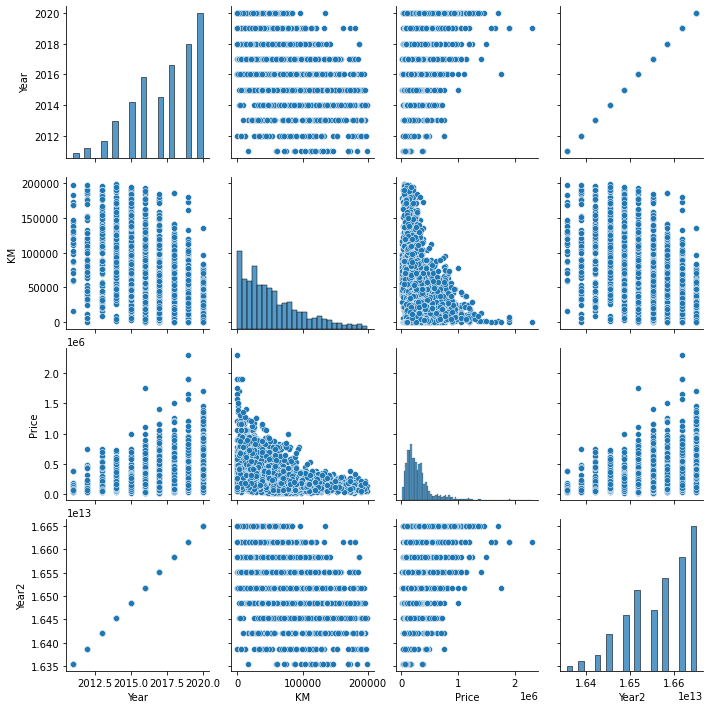

In [303]:
sns.pairplot(X2)

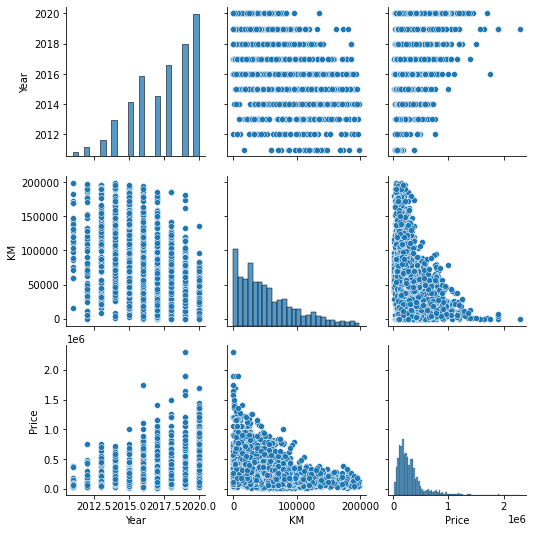

In [289]:
sns.pairplot(my_df)

 Columns that are gone be used

In [695]:
#Num
df_cars = my_df[['Price','Year','KM']].copy()
df_cars.head()

,Price,Year,KM
0,750000.0,2016,19000.0
1,148000.0,2020,0.0
2,125000.0,2020,0.0
3,207000.0,2020,0.0
4,120000.0,2012,65000.0


In [696]:
#Category
#df_cars = ([df_cars,cyl_dummy], axis=1)
df_category = my_df[['Car_Name','Car_Make','Cylinder','Color','Gear',\
                                   'Drive_Train','Type_of_Fule','Dealership','Warranty']].copy()
df_cars = pd.concat([df_cars,df_category], axis=1)
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         3637 non-null   float64
 1   Year          3637 non-null   int64  
 2   KM            3637 non-null   float64
 3   Car_Name      3637 non-null   object 
 4   Car_Make      3637 non-null   object 
 5   Cylinder      3637 non-null   object 
 6   Color         3637 non-null   object 
 7   Gear          3637 non-null   object 
 8   Drive_Train   3637 non-null   object 
 9   Type_of_Fule  3637 non-null   object 
 10  Dealership    3637 non-null   object 
 11  Warranty      3637 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 341.1+ KB


In [697]:
df_cars['Price'] = df_cars['Price'].apply(lambda x:int(x))
df_cars['KM'] = df_cars['KM'].apply(lambda x:int(x))
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         3637 non-null   int64 
 1   Year          3637 non-null   int64 
 2   KM            3637 non-null   int64 
 3   Car_Name      3637 non-null   object
 4   Car_Make      3637 non-null   object
 5   Cylinder      3637 non-null   object
 6   Color         3637 non-null   object
 7   Gear          3637 non-null   object
 8   Drive_Train   3637 non-null   object
 9   Type_of_Fule  3637 non-null   object
 10  Dealership    3637 non-null   object
 11  Warranty      3637 non-null   object
dtypes: int64(3), object(9)
memory usage: 341.1+ KB


In [698]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         3637 non-null   int64 
 1   Year          3637 non-null   int64 
 2   KM            3637 non-null   int64 
 3   Car_Name      3637 non-null   object
 4   Car_Make      3637 non-null   object
 5   Cylinder      3637 non-null   object
 6   Color         3637 non-null   object
 7   Gear          3637 non-null   object
 8   Drive_Train   3637 non-null   object
 9   Type_of_Fule  3637 non-null   object
 10  Dealership    3637 non-null   object
 11  Warranty      3637 non-null   object
dtypes: int64(3), object(9)
memory usage: 341.1+ KB


In [699]:
df_cars.dropna(inplace= True)
df_cars.reset_index(inplace= True)
df_cars.drop('index', inplace=True, axis=1)

In [700]:
my_df.head()

,Car_Name,Car_Make,Color,Year,Gear,Cylinder,Drive_Train,Inside_Color,Inside_Type,Car_Model,Type_of_Fule,Dealership,Warranty,KM,Price
0,Ferrari,488,Red,2016,Automatic,8,RWD,Red,Leather,GTB,Gasoline,Agency,YES,19000.0,750000.0
1,Chrysler,300,White,2020,Automatic,8,RWD,White,Leather,S,Gasoline,Gulf,YES,0.0,148000.0
2,Honda,Accord,Silver,2020,Automatic,4,FWD,Beige,Leather,,Gasoline,Gulf,YES,0.0,125000.0
3,Toyota,Land Cruiser,White,2020,Automatic,6,FWD,Beige,Cloth,GXR,Gasoline,Gulf,YES,0.0,207000.0
4,BMW,X Series,Black Matte,2012,Automatic,8,AWD,Red,Leather,5 M,Gasoline,Agency,NO,65000.0,120000.0


In [702]:
df_cars.corr()

,Price,Year,KM
Price,1.000000,0.295593,-0.360044
Year,0.295593,1.000000,-0.639635
KM,-0.360044,-0.639635,1.000000


In [283]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show

# generate some synthetic time series for six different categories
cats = list("8462")
# yy = np.random.randn(2000)
# g = np.random.choice(cats, 2000)
# for i, l in enumerate(cats):
#     yy[g == l] += i // 2
# df = pd.DataFrame(dict(score=yy, group=g))

# find the quartiles and IQR for each category
groups = my_df.groupby('Price')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.Cylinder > upper.loc[cat]['Cylinder']) | (group.Cylinder < lower.loc[cat]['Cylinder'])]['Cylinder']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(tools="", background_fill_color="#efefef", x_range=cats, toolbar_location=None)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.Cylinder = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'Cylinder']),upper.Cylinder)]
lower.Cylinder = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'Cylinder']),lower.Cylinder)]

# stems
p.segment(cats, upper.Cylinder, cats, q3.Cylinder, line_color="black")
p.segment(cats, lower.Cylinder, cats, q1.Cylinder, line_color="black")

# boxes
p.vbar(cats, 0.7, q2.Cylinder, q3.Cylinder, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.Cylinder, q2.Cylinder, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.Cylinder, 0.2, 0.01, line_color="black")
p.rect(cats, upper.Cylinder, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"

show(p)

C:\Users\ahmad\AppData\Local\Temp/ipykernel_18124/1843293562.py:16: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  q1 = groups.quantile(q=0.25)
C:\Users\ahmad\AppData\Local\Temp/ipykernel_18124/1843293562.py:17: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  q2 = groups.quantile(q=0.5)
C:\Users\ahmad\AppData\Local\Temp/ipykernel_18124/1843293562.py:18: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  q3 = groups.quantile(q=0.75)


KeyError: 'Cylinder'

In [285]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show

# generate some synthetic time series for six different categories
cats = [4,6,8,12,10,5]
yy = my_df.Price
g = my_df.Cylinder
for i, l in enumerate(cats):
    yy[g == l] += i // 2
df = pd.DataFrame(dict(score=yy, group=g))

# find the quartiles and IQR for each category
groups = df.groupby('group')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

# find the outliers for each category
def outliers(group):
    cat = group.name
    return group[(group.score > upper.loc[cat]['score']) | (group.score < lower.loc[cat]['score'])]['score']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(tools="", background_fill_color="#efefef", x_range=cats, toolbar_location=None)

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper.score = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'score']),upper.score)]
lower.score = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'score']),lower.score)]

# stems
p.segment(cats, upper.score, cats, q3.score, line_color="black")
p.segment(cats, lower.score, cats, q1.score, line_color="black")

# boxes
p.vbar(cats, 0.7, q2.score, q3.score, fill_color="#E08E79", line_color="black")
p.vbar(cats, 0.7, q1.score, q2.score, fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(cats, lower.score, 0.2, 0.01, line_color="black")
p.rect(cats, upper.score, 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=6, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="16px"

show(p)

C:\Users\ahmad\AppData\Local\Temp/ipykernel_18124/1611907121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yy[g == l] += i // 2


ValueError: Unrecognized range input: '[4, 6, 8, 12, 10, 5]'

In [286]:
from bokeh.charts import BoxPlot, output_notebook, show
import pandas as pd
  
# output to notebook
output_notebook()
  
# read data in dataframe
df = pd.read_csv(r"D:/kaggle / mcdonald / menu.csv")
  
# create bar
p = BoxPlot(df, values = "Protein", label = "Category", 
            color = "yellow", title = "Protein Summary (grouped by category)",
             legend = "top_right")
  
# show the results
show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

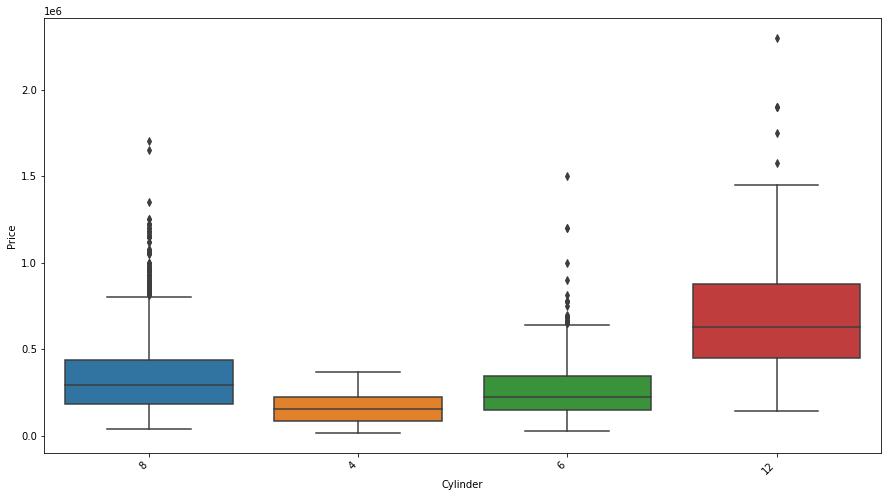

In [277]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Cylinder', y = 'Price', data = my_df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

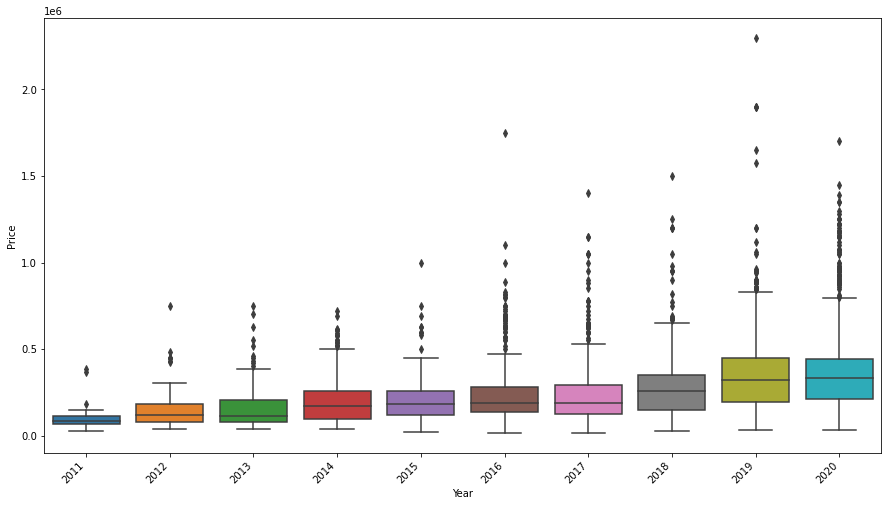

In [278]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Year', y = 'Price', data = my_df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

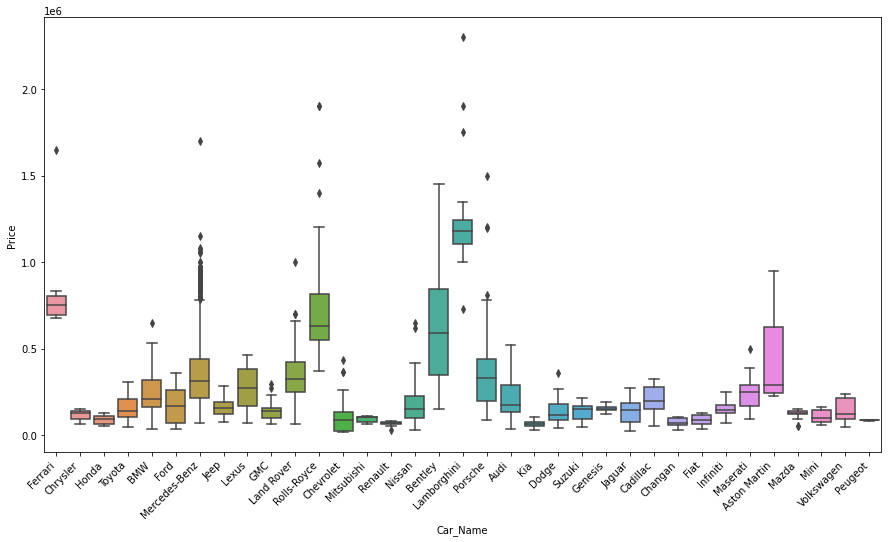

In [279]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'Car_Name', y = 'Price', data = my_df)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

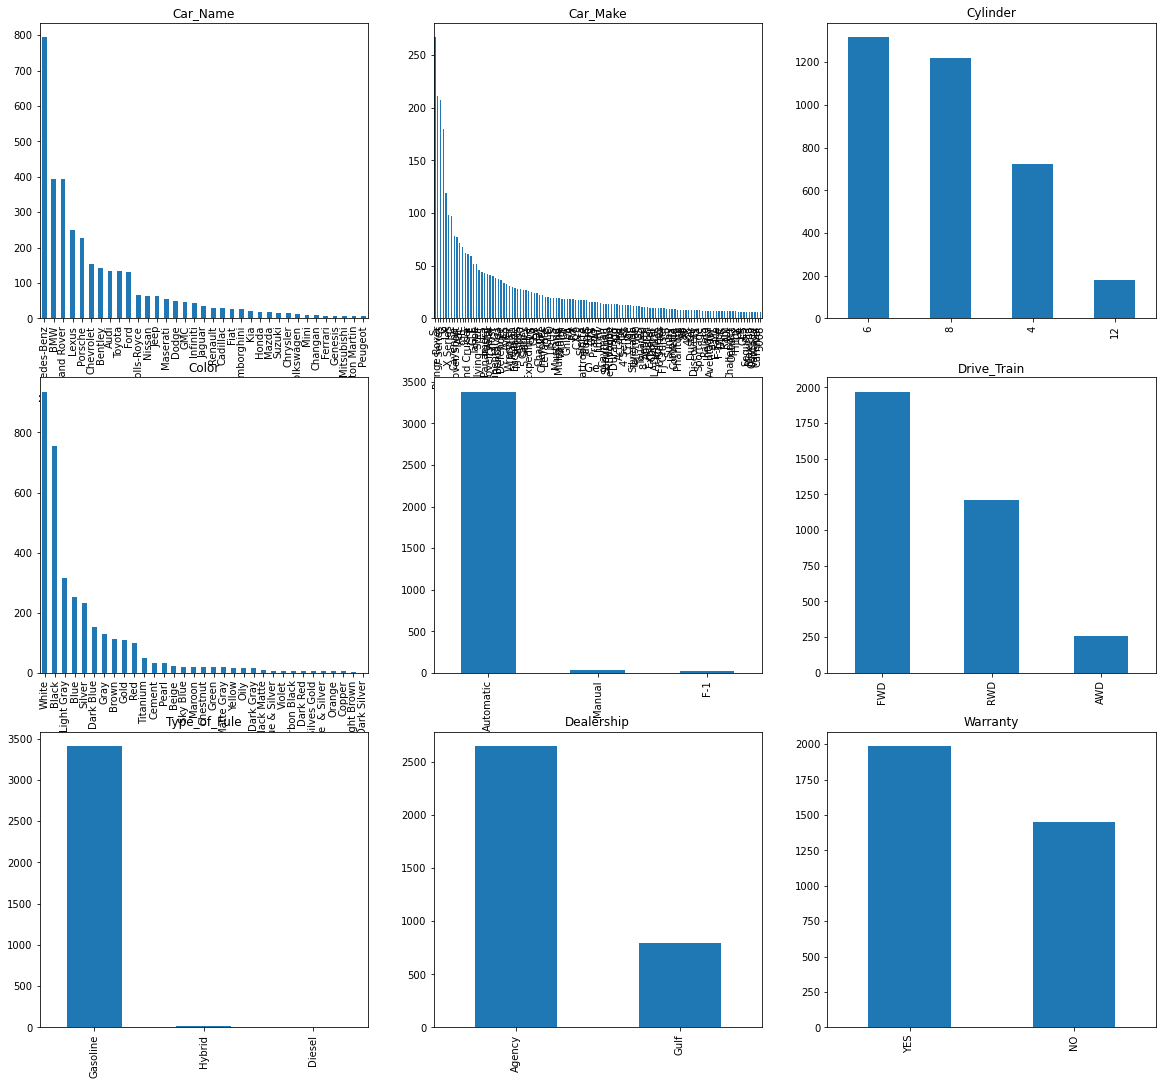

In [280]:

# Listing categorical columns for checking data imbalance and plotting them
col_category =['Car_Name','Car_Make','Cylinder','Color','Gear',\
                                   'Drive_Train','Type_of_Fule','Dealership','Warranty']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    my_df[col].value_counts().plot(kind='bar');
    plt.title(col)

### Model

In [119]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [265]:
X = my_df.drop(columns= ['Price','Inside_Color','Inside_Type','Car_Model'])
y = my_df['Price']

In [266]:
X,X_test,y,y_test=train_test_split(X,y,test_size=0.2, random_state= 50)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25, random_state= 50)

In [267]:
ohe=OneHotEncoder()
ohe.fit(X[['Car_Name','Car_Make','Cylinder','Color','Gear',\
                                   'Drive_Train','Type_of_Fule','Dealership','Warranty']])


OneHotEncoder()

In [268]:
#Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Car_Name','Car_Make','Cylinder','Color','Gear',\
                                   'Drive_Train','Type_of_Fule','Dealership','Warranty']),\
                                    remainder='passthrough')

In [269]:
lr=LinearRegression()

In [270]:
pipe=make_pipeline(column_trans,lr)

In [271]:
pipe.fit(X_train,y_train);

In [272]:
y_pred_train=pipe.predict(X_train)
r2_score(y_train,y_pred_train)

0.8508133918324623

In [273]:
y_pred_val=pipe.predict(X_val)
r2_score(y_val,y_pred_val)

0.833945103847951

In [274]:
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8162533079114431

In [110]:
lr.intercept_

-75948164.05814496

C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


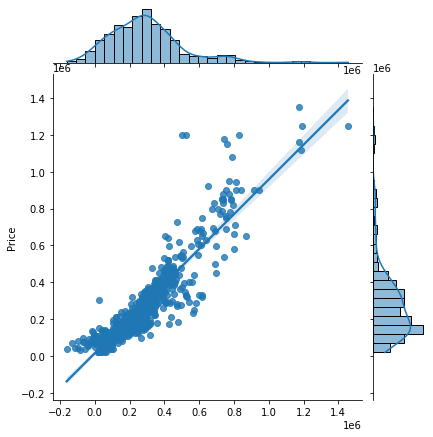

In [260]:
sns.jointplot(y_pred, y_test, kind='reg')

# Lasso 

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV

In [210]:
lasso = LassoCV()

In [314]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [316]:
numeric_features = ['Year','KM']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Car_Name','Car_Make','Cylinder','Color','Gear','Drive_Train','Type_of_Fule','Dealership','Warranty']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Lasso', LassoCV())])

X = my_df.drop('Price', axis=1)
y = my_df['Price']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state= 40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state= 40)

lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print("Model train score (lasso): %.3f" % lasso.score(X_train, y_train))
print("Model val score (lasso): %.3f" % lasso.score(X_val, y_val))
print("Model test score (lasso): %.3f" % r2_score(y_test,y_pred))

Model train score (lasso): 0.858
Model val score (lasso): 0.795
Model test score (lasso): 0.799


In [310]:
X2.head()

,Car_Name,Car_Make,Color,Gear,Cylinder,Drive_Train,Inside_Color,Inside_Type,Car_Model,Type_of_Fule,Dealership,Warranty,Price,Year2
0,Ferrari,488,Red,Automatic,8,RWD,Red,Leather,GTB,Gasoline,Agency,YES,750000.0,4064256
1,Chrysler,300,White,Automatic,8,RWD,White,Leather,S,Gasoline,Gulf,YES,148000.0,4080400
2,Honda,Accord,Silver,Automatic,4,FWD,Beige,Leather,,Gasoline,Gulf,YES,125000.0,4080400
3,Toyota,Land Cruiser,White,Automatic,6,FWD,Beige,Cloth,GXR,Gasoline,Gulf,YES,207000.0,4080400
4,BMW,X Series,Black Matte,Automatic,8,AWD,Red,Leather,5 M,Gasoline,Agency,NO,120000.0,4048144


C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


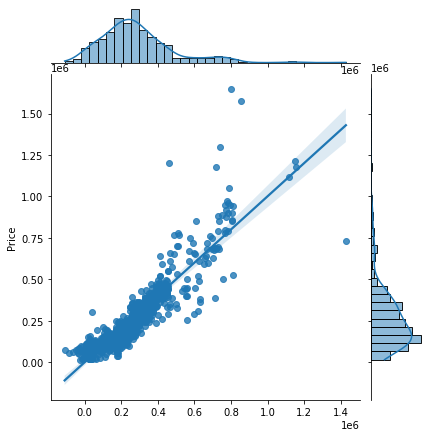

In [241]:
sns.jointplot(y_pred, y_test, kind='reg')

# Ridge

In [236]:
ridge = RidgeCV()

In [276]:
numeric_features = ['Year','KM']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Car_Name','Car_Make','Cylinder','Color','Gear','Drive_Train','Type_of_Fule','Dealership','Warranty']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Ridge', RidgeCV())])

X = my_df.drop('Price', axis=1)
y = my_df['Price']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state= 50)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state= 50)

ridge.fit(X_train, y_train)
y_pred=ridge.predict(X_test)
print("Model train score (ridge): %.3f" % ridge.score(X_train, y_train))
print("Model val score (ridge): %.3f" % ridge.score(X_val, y_val))
print("Model test score (ridge): %.3f" % r2_score(y_test,y_pred))

Model train score (ridge): 0.849
Model val score (ridge): 0.836
Model test score (ridge): 0.816


C:\Users\ahmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


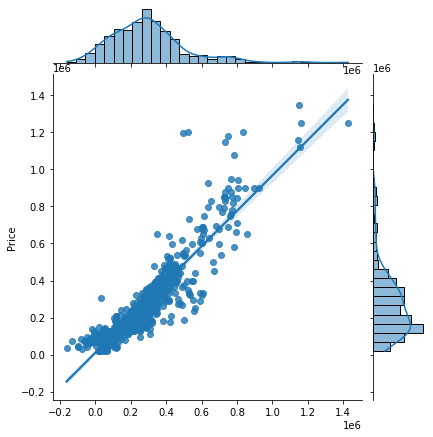

In [244]:
sns.jointplot(y_pred, y_test, kind='reg')